# Quantum Optimization Run

This notebook executes a single run of the quantum optimization pipeline. The parameters for the run are specified in a YAML file.

In [ ]:
import json
import logging
import os
import sys

import yaml

from pipeline.main import single_run

logger = logging.getLogger("pipeline_logger")


def configure_logger():

    # Remove all existing handlers if the cell is run multiple times
    if logger.hasHandlers():
        logger.handlers.clear()

    logger.setLevel(logging.INFO)

    ch = logging.StreamHandler(sys.stdout)
    ch.setLevel(logging.INFO)

    formatter = logging.Formatter('[%(asctime)s] %(levelname)s: %(message)s')
    ch.setFormatter(formatter)
    
    logger.addHandler(ch)


def read_parameters(parameter_path: str) -> dict:

    if not os.path.isfile(parameter_path):
        logger.error(f"Error: file '{parameter_path}' does not exist.")
        sys.exit(1)

    try:

        with open(parameter_path, 'r') as file:
            return yaml.safe_load(file)

    except Exception as e:

        logger.error(f"Error reading parameters file: {e}")
        sys.exit(1)

[2025-11-11 17:42:36,111] INFO: reading parameters file: 'params.yaml'
[2025-11-11 17:42:36,155] INFO: Using seed 12345
[2025-11-11 17:42:36,160] INFO: Output will be written in ./delme
[2025-11-11 17:42:36,182] INFO: Building problem SimpleProductionPlanningProblem
[2025-11-11 17:42:36,155] INFO: Using seed 12345
[2025-11-11 17:42:36,160] INFO: Output will be written in ./delme
[2025-11-11 17:42:36,182] INFO: Building problem SimpleProductionPlanningProblem
[2025-11-11 17:42:36,352] INFO: The problem has 12 logic qubits
[2025-11-11 17:42:36,352] INFO: Building QAOA circuit QAOACircuit with 3 layers
[2025-11-11 17:42:36,375] INFO: Transpiling QAOA circuit QAOACircuit for None
[2025-11-11 17:42:36,352] INFO: The problem has 12 logic qubits
[2025-11-11 17:42:36,352] INFO: Building QAOA circuit QAOACircuit with 3 layers
[2025-11-11 17:42:36,375] INFO: Transpiling QAOA circuit QAOACircuit for None
[2025-11-11 17:42:36,718] INFO: The problem has 12 physical qubits
[2025-11-11 17:42:36,721] 

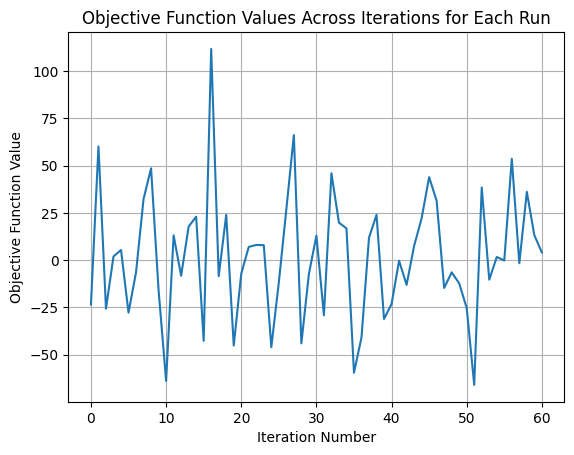

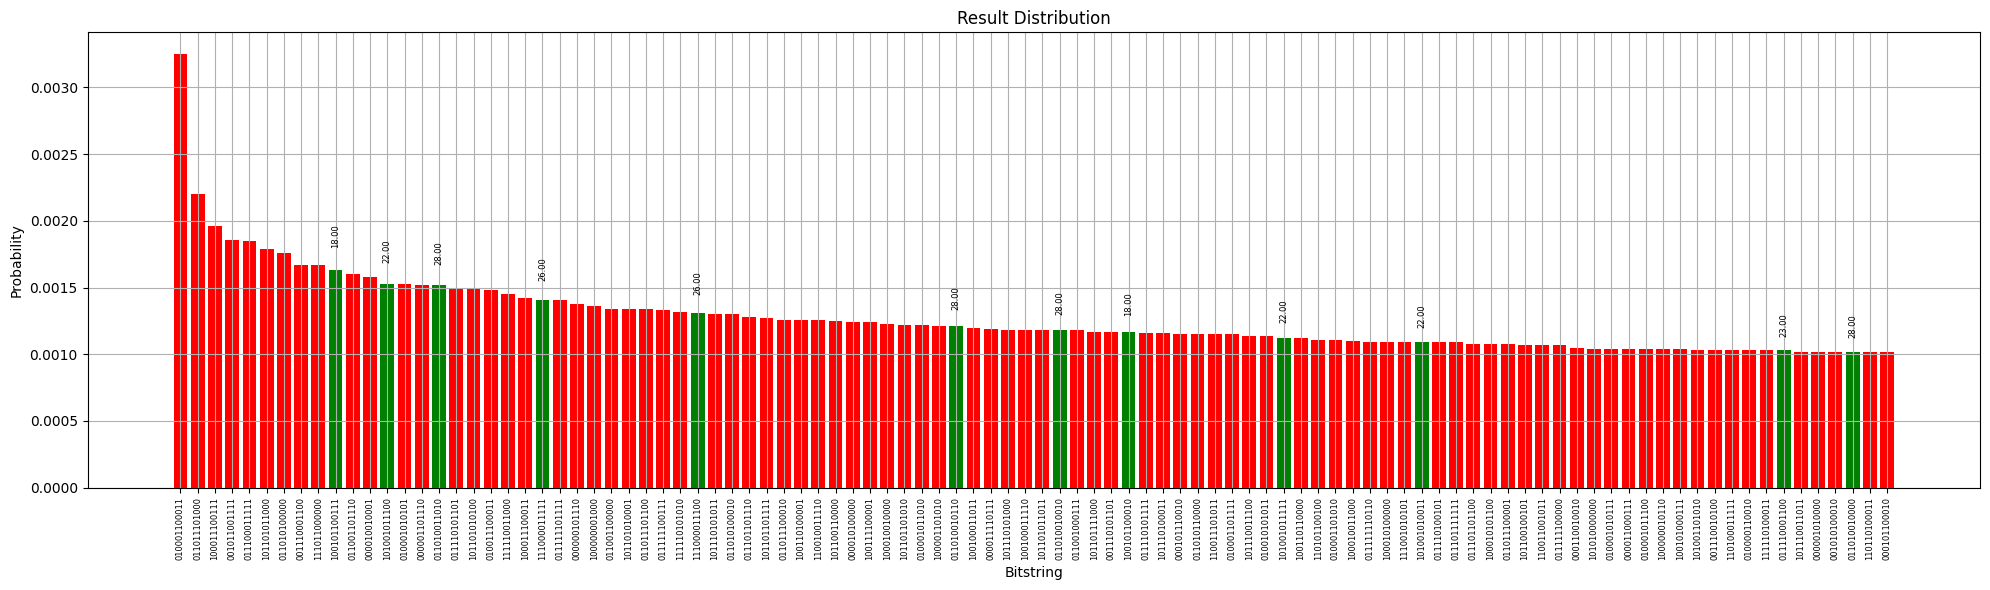

In [ ]:
configure_logger()

# In a notebook, we can't use sys.argv. 
# Instead, specify the path to the parameter file directly.
parameter_path = 'params.yaml'

logger.info(f"reading parameters file: '{parameter_path}'")
parameter_dict = read_parameters(parameter_path)

if parameter_dict:
    output_folder = parameter_dict.get('output_folder', '.')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    output_dict = single_run(parameter_dict)

    output_file_path = os.path.join(output_folder, "output.json")
    logger.info(f"writing output file: {output_file_path}")
    with open(output_file_path, "w") as f:
        json.dump(output_dict, f, indent=4)
else:
    logger.error("Failed to read parameter file. Halting execution.")